## Importando as bibliotecas necessárias

In [183]:
import pandas as pd

## Carregando o arquivo CSV com os dados dos passageiros

In [184]:
passageiros=pd.read_csv("raw-data/passageiros.csv")

## Visualizando as primeiras linhas dos dados

In [185]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Importando a biblioteca Seaborn

In [186]:
import seaborn as sns

## Configurando o tamanho e as fontes das figuras

In [187]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 20

## Criando um gráfico de linha para visualizar a quantidade de passageiros ao longo do tempo

<Axes: xlabel='tempo', ylabel='passageiros'>

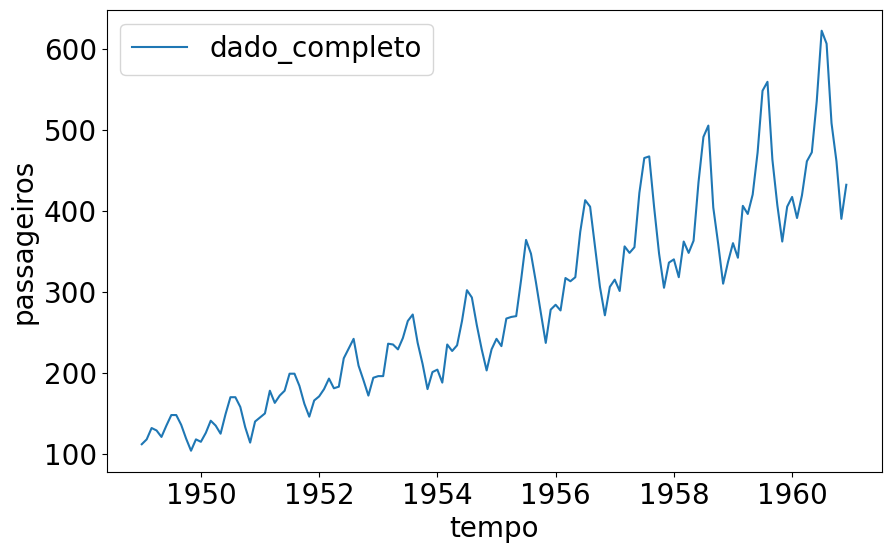

In [188]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")

## Importando o StandardScaler da biblioteca Scikit-learn para escalonamento dos dados

In [189]:
from sklearn.preprocessing import StandardScaler

## Instanciando o StandardScaler

In [190]:
sc=StandardScaler()

## Ajustando o StandardScaler aos dados

In [191]:
sc.fit(passageiros)

StandardScaler()

## Normalizando os dados

In [192]:
dado_normalizado=sc.transform(passageiros)

## Separando os dados normalizados em variáveis x e y

In [193]:
x=dado_normalizado[:,0]
y=dado_normalizado[:,1]

## Importando o Matplotlib para visualização

In [194]:
import matplotlib.pyplot as plt

## Plotando os dados normalizados em um gráfico de linha

Text(0.5, 0, 'Data')

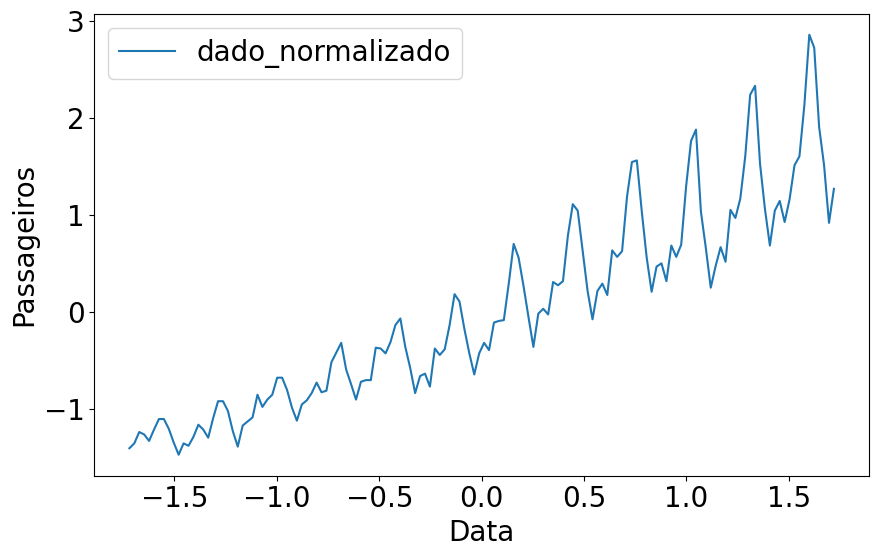

In [195]:
sns.lineplot(x=x, y=y, label="dado_normalizado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Definindo os tamanhos de treino e teste

In [196]:
size_treino=int(len(passageiros)*0.9)
size_teste=len(passageiros)-size_treino

## Separando os dados de treino

In [197]:
x_treino=x[0:size_treino]
y_treino=y[0:size_treino]

## Separando os dados de teste

In [198]:
x_teste=x[size_treino:len(passageiros)]
y_teste=y[size_treino:len(passageiros)]

## Plotando os dados de treino e teste

Text(0.5, 0, 'Data')

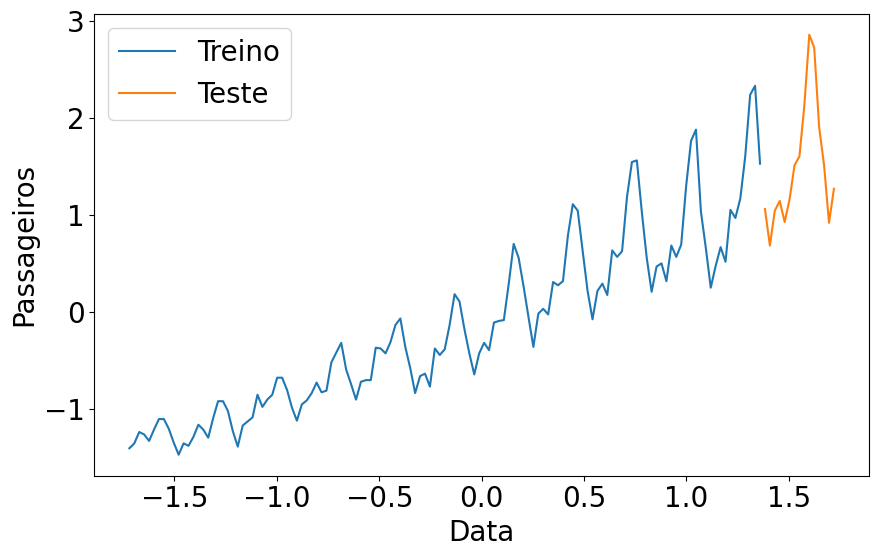

In [199]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Importando as classes Sequential e Dense do TensorFlow

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Criando uma instância do modelo Sequential
Aqui estamos criando um modelo sequencial, que será usado para empilhar camadas de uma rede neural.

In [201]:
regressor=Sequential()

## Adicionando uma camada densa com ativação linear
Aqui estamos adicionando uma camada densa ao modelo, com 1 neurônio e ativação linear. O kernel é inicializado com valores "Ones" e a camada não utiliza bias.

In [253]:
regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", activation="linear", use_bias=False))

## Compilando o modelo
Nesta célula, o modelo é compilado com a função de perda mean squared error (erro quadrático médio) e o otimizador adam, que ajustará os pesos durante o treinamento.

In [203]:
regressor.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do modelo
Aqui, o método summary é usado para visualizar a arquitetura do modelo, incluindo o número de parâmetros treináveis em cada camada.

In [204]:
regressor.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo
Nesta célula, o modelo é treinado com os dados de treino x_treino e y_treino.

In [205]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.12551


## Fazendo previsões com o modelo
Aqui estamos utilizando o método predict para gerar as previsões com base nos dados de treino.

In [206]:
y_pred=regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


## Plotando o resultado do treino e as previsões
Nesta célula, são plotados os valores reais do treino e as previsões geradas pelo modelo em um gráfico de linha para comparação.

<Axes: >

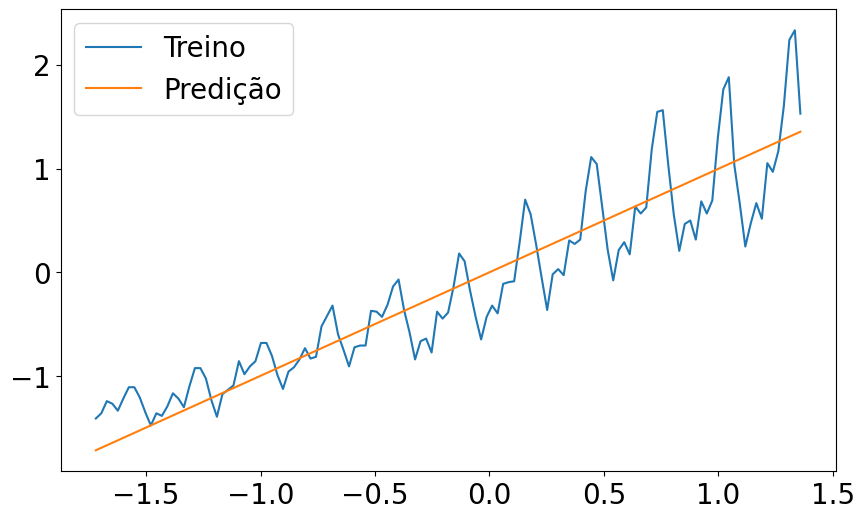

In [207]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Predição")

## Criando um dicionário com os dados para o DataFrame

In [208]:
d={"Tempo": x_treino, "Passageiros": y_pred[:,0]}

## Criando um DataFrame com o dicionário de dados

In [209]:
resultado=pd.DataFrame(data=d)

## Exibindo o DataFrame resultante

In [210]:
resultado

,Tempo,Passageiros
0,-1.720064,-1.713870
1,-1.696007,-1.689900
2,-1.671950,-1.665930
3,-1.647894,-1.641959
4,-1.623837,-1.617989
...,...,...
124,1.262984,1.258436
125,1.287041,1.282406
126,1.311098,1.306376
127,1.335155,1.330347


## Aplicando a transformação inversa para voltar à escala original
Nesta célula, estamos utilizando inverse_transform para aplicar a transformação inversa no DataFrame resultado, retornando os valores à escala original.

In [211]:
resultado_transf=sc.inverse_transform(resultado)

## Criando um DataFrame com os dados transformados
Aqui, criamos um DataFrame com os dados transformados para a escala original, armazenando em resultado_transf.

In [212]:
resultado_transf=pd.DataFrame(resultado_transf)

## Renomeando as colunas do DataFrame transformado
Nesta célula, estamos renomeando as colunas de resultado_transf para "Tempo" e "Passageiros" para que elas correspondam aos nomes das colunas do DataFrame original.

In [213]:
resultado_transf.columns=["Tempo", "Passageiros"]

## Plotando os dados originais e ajustados
Aqui, utilizamos o seaborn.lineplot para plotar os dados originais de passageiros e o ajuste de treino em dois gráficos de linha distintos para comparação.

<Axes: xlabel='tempo', ylabel='passageiros'>

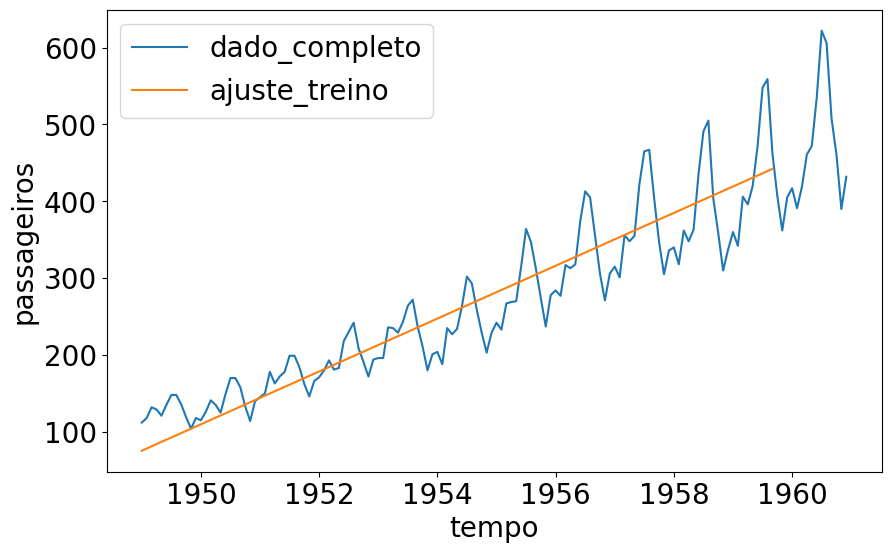

In [214]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")

## Fazendo previsões com os dados de teste

In [215]:
y_pred_teste=regressor.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


## Criando um dicionário com as previsões do teste
Nesta célula, criamos um dicionário com as colunas "Tempo" e "Passageiros", onde "Tempo" contém os dados de x_teste e "Passageiros" contém as previsões de y_pred_teste.

In [216]:
d={"Tempo": x_teste, "Passageiros": y_pred_teste[:,0]}
resultado_teste=pd.DataFrame(data=d)

## Aplicando a transformação inversa aos dados de teste
Aqui aplicamos a função inverse_transform ao DataFrame de teste para retornar os dados à escala original.

In [217]:
resultado_transf_teste=sc.inverse_transform(resultado_teste)

## Criando um DataFrame com os dados transformados do teste
Nesta célula, criamos um novo DataFrame com os dados de teste transformados, armazenando-o como resultado_transf_teste.

In [218]:
resultado_transf_teste=pd.DataFrame(resultado_transf_teste)

## Renomeando as colunas do DataFrame de teste transformado

In [219]:
resultado_transf_teste.columns=["Tempo", "Passageiros"]

## Plotando os dados reais, o ajuste de treino e as previsões do teste
Nesta célula, são gerados gráficos de linha com os dados reais, o ajuste de treino e as previsões feitas sobre os dados de teste, permitindo comparar os três conjuntos de dados.

<Axes: xlabel='tempo', ylabel='passageiros'>

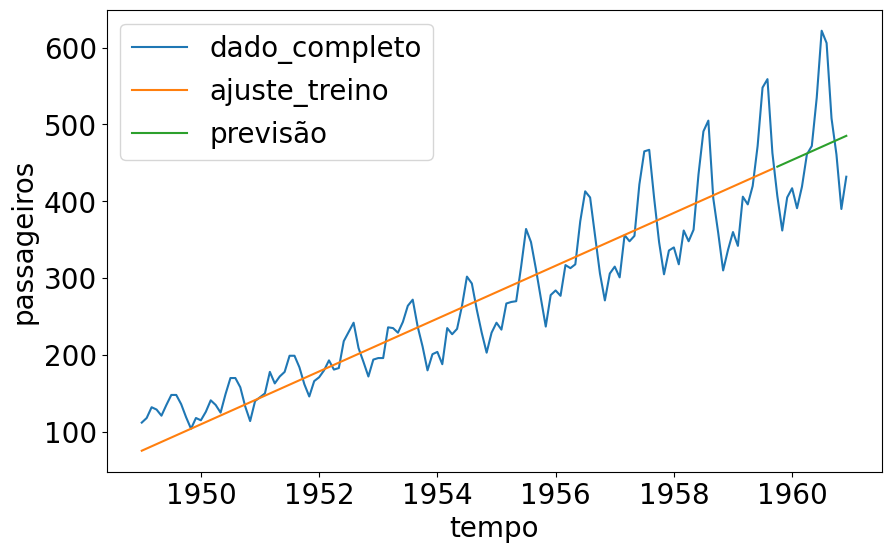

In [220]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf_teste, label="previsão")

## Criando um novo modelo sequencial

In [221]:
regressor2=Sequential()

## Adicionando camadas densas ao modelo
Estamos adicionando três camadas densas (Dense) ao modelo:
1. A primeira camada com 8 neurônios e dimensão de entrada 1, com inicialização aleatória (random_uniform) e ativação linear.
2. A segunda camada com 8 neurônios, também com inicialização aleatória e ativação linear.
3. A terceira camada com 1 neurônio, para produzir a saída final, novamente com inicialização aleatória e ativação linear. Em todas as camadas, o bias não é utilizado.

In [252]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

## Compilando o novo modelo
Nesta célula, estamos compilando o modelo regressor2 utilizando a função de perda mean squared error (erro quadrático médio) e o otimizador adam.

In [223]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do novo modelo

In [224]:
regressor2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo com os dados de treino
Nesta célula, estamos treinando o modelo regressor2 utilizando os dados de treino x_treino e y_treino por 200 épocas. Durante esse processo, o modelo ajusta seus pesos para minimizar o erro.

In [225]:
regressor2.fit(x_treino, y_treino, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9027  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8284
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8149
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7715 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7367 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8048
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8465
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7651
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8300
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7670
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7900
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7310
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8484 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7632 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6998 
Epoch 16/200
5/5 ━━━━━━━━━━

## Fazendo previsões com os dados de treino

In [226]:
y_pred=regressor2.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


## Fazendo previsões com os dados de teste

In [227]:
y_pred_teste=regressor2.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


## Plotando os resultados das previsões e dos dados reais
Aqui estamos utilizando seaborn para gerar gráficos de linha que comparam:
1. Os dados reais de treino (x_treino, y_treino).
2. Os dados reais de teste (x_teste, y_teste).
3. As previsões feitas com os dados de treino (x_treino, y_pred).
4. As previsões feitas com os dados de teste (x_teste, y_pred_teste).
Esses gráficos permitem visualizar como o modelo se ajustou aos dados e a precisão das previsões.

<Axes: >

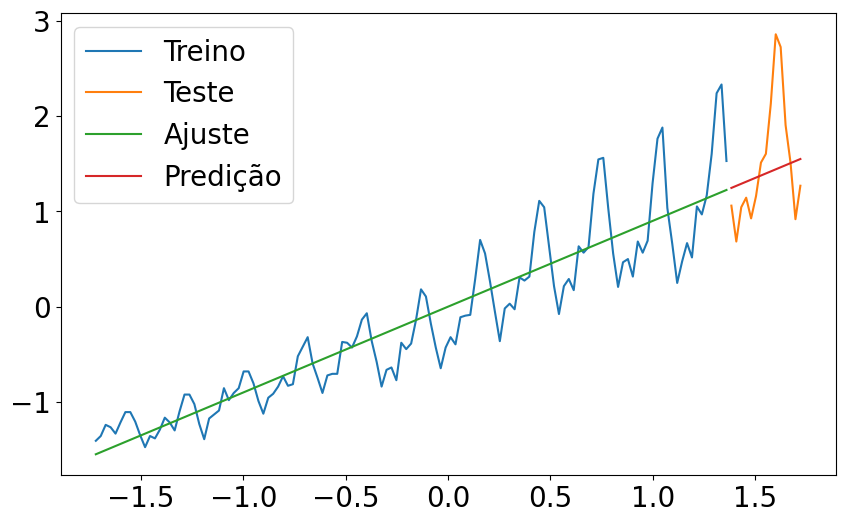

In [228]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Ajuste")
sns.lineplot(x=x_teste, y=y_pred_teste[:,0], label="Predição")

In [229]:
regressor2=Sequential()

## Adicionando camadas densas ao modelo com novas funções de ativação
Foram feitas as seguintes alterações nas camadas:
1. A primeira camada tem 8 neurônios com ativação sigmoid, dimensão de entrada 1, e inicialização aleatória (random_uniform). Não utiliza bias.
2. A segunda camada tem 8 neurônios com ativação sigmoid, e também não utiliza bias.
3. A terceira camada tem 1 neurônio com ativação linear para a saída final, mantendo a inicialização aleatória e sem utilizar bias.
Essas alterações no uso de funções de ativação podem influenciar a maneira como a rede aprende e ajusta os pesos.

In [251]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

## Compilando o novo modelo com as camadas ajustadas
Aqui, compilamos o modelo com a função de perda mean squared error (erro quadrático médio) e o otimizador adam, mantendo as mesmas configurações da versão anterior.

In [231]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do novo modelo

In [232]:
regressor2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo com 500 épocas
Nesta célula, estamos treinando o modelo regressor2 por 500 épocas, uma mudança em relação ao treinamento anterior, que utilizava menos épocas. Esse aumento no número de épocas permite que o modelo tenha mais iterações sobre os dados de treino, potencialmente melhorando o ajuste da rede neural.

In [233]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7682  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7714 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8337 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7854
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7512
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8156 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7418 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8004 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7986
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7880 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7786
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8267
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7552 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7522 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7832 
Epoch 16/500
5/5 ━━━━━━

In [234]:
y_pred=regressor2.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [235]:
y_pred_teste=regressor2.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


## Plotando os resultados do treino, teste, ajuste e previsão
Aqui utilizamos o seaborn para gerar gráficos de linha que comparam:
1. Os dados reais de treino (x_treino, y_treino).
2. Os dados reais de teste (x_teste, y_teste).
3. As previsões feitas pelo modelo para os dados de treino (x_treino, y_pred).
4. As previsões feitas pelo modelo para os dados de teste (x_teste, y_pred_teste).
Esses gráficos permitem visualizar como o modelo se ajustou aos dados e avaliar a precisão das previsões.

<Axes: >

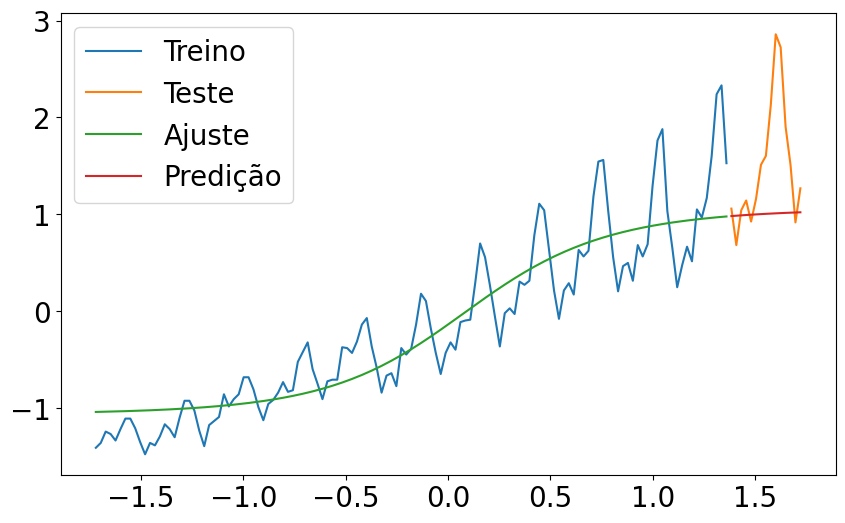

In [236]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Ajuste")
sns.lineplot(x=x_teste, y=y_pred_teste[:,0], label="Predição")

Neste notebook, estamos desenvolvendo um modelo de regressão utilizando redes neurais, com a ajuda da biblioteca Keras (integrada ao TensorFlow). O objetivo principal é prever valores baseados em um conjunto de dados de treino e avaliar a performance do modelo com base em dados de teste. Vamos detalhar passo a passo o que fizemos até o momento.

### 1. Construção do Modelo Inicial

Iniciamos a criação do nosso modelo neural utilizando o Sequential, que permite empilhar camadas densas (fully connected) de forma simples e sequencial. Definimos três camadas:
- Primeira camada: Com 8 neurônios, função de ativação sigmoid, sem bias, e com inicialização aleatória dos pesos (random_uniform). Essa camada recebe os dados de entrada com dimensão 1.
- Segunda camada: Também com 8 neurônios e ativação sigmoid, sem bias, e mantendo a inicialização aleatória.
- Terceira camada: Camada de saída com 1 neurônio, ativação linear e sem bias. O uso de ativação linear nesta camada é importante, pois estamos realizando uma tarefa de regressão, que exige uma saída contínua.

### 2. Compilação do Modelo

Após definir a arquitetura, compilamos o modelo utilizando:
- Função de perda: mean squared error (erro quadrático médio), que é uma métrica comum em problemas de regressão, pois mede a diferença quadrática entre os valores reais e as previsões.
- Otimizador: adam, um algoritmo de otimização muito eficiente que combina as melhores características do método de descida de gradiente, adaptando a taxa de aprendizado ao longo do treinamento.

### 3. Treinamento do Modelo

O treinamento foi realizado utilizando os dados de treino (x_treino e y_treino), ajustando o modelo por 500 épocas. O número de épocas controla quantas vezes o modelo passa por todo o conjunto de dados de treino. Um número maior de épocas permite que o modelo tenha mais tempo para ajustar os pesos, embora isso também possa levar ao overfitting (quando o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados).

### 4. Previsões

Após o treinamento, utilizamos o modelo treinado para fazer previsões tanto com os dados de treino quanto com os dados de teste:
- Previsão com os dados de treino: Serve para avaliar como o modelo se ajustou ao próprio conjunto de dados com o qual foi treinado.
- Previsão com os dados de teste: Utilizamos dados nunca vistos pelo modelo para verificar sua capacidade de generalização, ou seja, o quão bem ele consegue prever novos dados.

### 5. Visualização dos Resultados

Para facilitar a compreensão dos resultados, utilizamos a biblioteca Seaborn para plotar gráficos de linha que mostram:
- Os valores reais dos dados de treino e teste.
- As previsões feitas pelo modelo tanto para o treino quanto para o teste.

Esses gráficos nos permitem comparar visualmente como o modelo está se comportando:
- Se as linhas das previsões e dos valores reais estão muito próximas, significa que o modelo está ajustado de maneira eficiente.
- Se houver uma discrepância grande entre as previsões e os valores reais (especialmente nos dados de teste), pode indicar que o modelo não generalizou bem ou está superajustado aos dados de treino.

### 6. Ajustes Finais no Modelo

O modelo foi modificado algumas vezes para incluir diferentes funções de ativação (sigmoid nas camadas ocultas e linear na camada de saída) e treinar por 500 épocas. Esses ajustes permitiram que a rede neural capturasse melhor as relações nos dados.

In [237]:
import numpy as np

## Criando um DataFrame a partir da coluna de treino

In [238]:
vetor=pd.DataFrame(y_treino)[0]

## Função para separar dados em entradas (x) e saídas (y)
Esta função separa_dados está sendo usada para dividir o vetor em conjuntos de entradas (x_novo) e saídas (y_novo). O parâmetro n_passos define quantos passos anteriores serão considerados para prever o valor atual. Para cada ponto de dados, x_novo armazena os últimos n_passos, enquanto y_novo armazena o valor correspondente da série temporal.

In [239]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    for i in range(n_passos, len(vetor)):
        # Corrigir a seleção do vetor para garantir que x_novo tenha características
        x_novo.append(vetor[i-n_passos:i].values)  # Pegue os últimos n_passos
        y_novo.append(vetor[i])  # O valor alvo
    return np.array(x_novo), np.array(y_novo)

## Criando e verificando os dados de treino
Nesta célula, estamos convertendo a primeira coluna de y_treino em um DataFrame (vetor) para posteriormente separá-lo em entradas (x_treino_novo) e saídas (y_treino_novo) com a função separa_dados. O parâmetro n_passos = 1 indica que o modelo utilizará o valor anterior para prever o próximo. 

Após a execução, verificamos as formas dos dados de treino:
- x_treino_novo tem 128 amostras com 1 característica cada (forma (128, 1)).
- y_treino_novo contém 128 valores correspondentes aos alvos, com a forma (128,).

Isso significa que os dados foram processados corretamente e estão prontos para serem usados no treinamento do modelo.

In [240]:
# Supondo que 'vetor' seja um DataFrame com a coluna de treino
vetor = pd.DataFrame(y_treino)[0]

# Criando as variáveis de treino com n_passos = 1
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

# Verificando o formato dos dados gerados
print(x_treino_novo.shape)  # Deve ser (n_amostras, n_passos)
print(y_treino_novo.shape)  # Deve ser (n_amostras,)

(128, 1)
(128,)


## Criando e verificando os dados de teste
Nesta célula, estamos convertendo a primeira coluna de y_teste em um DataFrame (vetor2) e, em seguida, aplicamos a função separa_dados para dividir o vetor em x_teste_novo e y_teste_novo, com n_passos = 1. Isso significa que para cada ponto no vetor de teste, o modelo utilizará o valor anterior para prever o próximo valor. Após isso, estamos verificando o formato dos dados gerados.

O resultado mostra que temos 14 amostras no conjunto de teste, cada uma com 1 característica (coluna) em x_teste_novo, e o vetor y_teste_novo tem 14 valores correspondentes.

In [241]:
# Supondo que 'vetor2' seja um DataFrame com a coluna de teste
vetor2 = pd.DataFrame(y_teste)[0]

# Criando as variáveis de teste com n_passos = 1
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

# Verificando o formato dos dados gerados
print(x_teste_novo.shape)  # Deve ser (n_amostras, n_passos)
print(y_teste_novo.shape)  # Deve ser (n_amostras,)

(14, 1)
(14,)


## Definindo e compilando o modelo de rede neural
Nesta célula, estamos criando um modelo sequencial chamado regressor3 utilizando o Keras. Em seguida, adicionamos três camadas densas ao modelo:

1. A primeira camada tem 8 neurônios, com ativação linear, e utiliza os valores de x_treino_novo como entrada, especificamente a quantidade de características definida por x_treino_novo.shape[1].
2. A segunda camada tem 64 neurônios, utiliza uma ativação sigmoide e inicializa os pesos de maneira aleatória.
3. A terceira camada é a camada de saída, com apenas 1 neurônio e ativação linear para fornecer a saída contínua, já que estamos realizando uma tarefa de regressão.

Depois de definir as camadas, o modelo é compilado utilizando a função de perda mean_squared_error, apropriada para problemas de regressão. O otimizador escolhido é o adam, que é amplamente utilizado por sua eficiência em problemas complexos de ajuste de pesos.

Finalmente, o comando summary() exibe uma descrição detalhada do modelo, mostrando as camadas, o número de parâmetros treináveis e não treináveis.

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Criando um novo modelo sequencial
regressor3 = Sequential()

# Adicionando as camadas densas
regressor3.add(Dense(8, input_dim=x_treino_novo.shape[1], kernel_initializer="ones", activation="linear", use_bias=False))
regressor3.add(Dense(64, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor3.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

# Compilando o modelo
regressor3.compile(loss="mean_squared_error", optimizer="adam")

# Exibindo o resumo do modelo
regressor3.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584 (2.28 KB)

 Trainable params: 584 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo e fazendo previsões
Nesta célula, estamos realizando duas etapas importantes:

1. **Treinamento do modelo**:
   O modelo regressor3 está sendo treinado utilizando os dados de treino x_treino_novo (as características de entrada) e y_treino_novo (os valores-alvo). O treinamento será realizado ao longo de 100 épocas, onde o modelo passará pelos dados de treino 100 vezes para ajustar seus pesos e melhorar suas previsões.

2. **Fazendo previsões**:
   Após o treinamento, fazemos previsões tanto nos dados de treino quanto nos dados de teste. As previsões com os dados de treino são armazenadas em y_pred_treino e as previsões com os dados de teste são armazenadas em y_pred_teste.

3. **Exibindo as previsões**:
   Por fim, estamos imprimindo os valores de y_pred_treino e y_pred_teste para visualizar as previsões feitas pelo modelo.

In [243]:
# Treinando o modelo com os dados de treino
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

# Fazendo previsões
y_pred_treino = regressor3.predict(x_treino_novo)
y_pred_teste = regressor3.predict(x_teste_novo)

# Exibindo as previsões
print(y_pred_treino)
print(y_pred_teste)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7081 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6593 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7022
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7344
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6257 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7056 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6859 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6159
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5456 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5334 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5188
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4421 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3995 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4209
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3565 
Epoch 16/100
4/4 ━━━━━━━

## Fazendo previsões com os dados de treino

In [244]:
y_pred_novo = regressor3.predict(x_treino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## Plotando o gráfico de treino e predição

<Axes: xlabel='tempo', ylabel='0'>

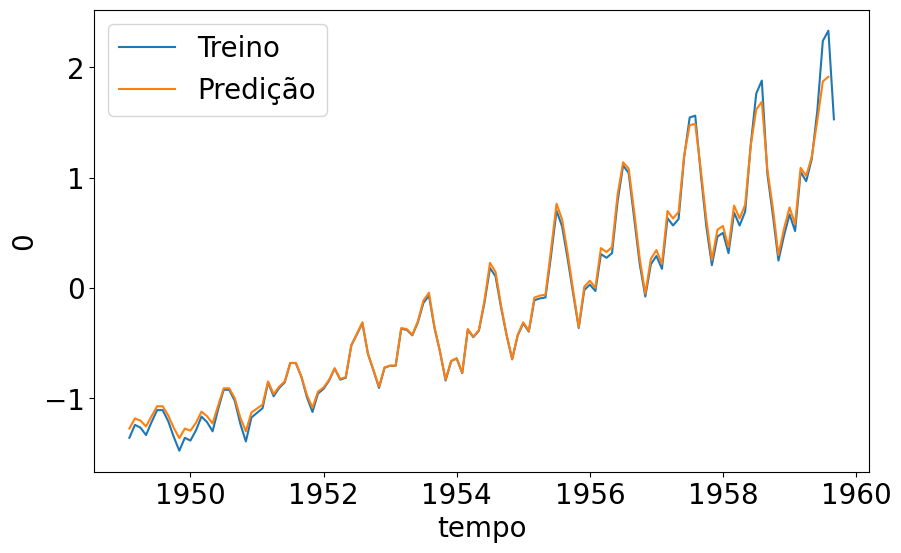

In [245]:
sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[1:129], label="Treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_pred_novo)[0], data=passageiros[1:129], label="Predição")

## Fazendo previsões com os dados de teste

In [246]:
y_pred_teste_novo = regressor3.predict(x_teste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


## Convertendo as predições em DataFrame

In [247]:
resultado=pd.DataFrame(y_pred_teste_novo)[0]

## Plotando os gráficos de treino, ajuste e previsão
Utilizamos o Seaborn para plotar quatro gráficos:

1. **Gráfico de treino**: Plota os valores reais do conjunto de treino (y_treino_novo) versus os dados de passageiros do intervalo [1:129], rotulado como "Treino".
   
2. **Gráfico de ajuste**: Plota as predições do modelo com os dados de treino (y_pred_novo) versus os dados de passageiros do mesmo intervalo, rotulado como "Ajuste_treino", permitindo comparar as predições do modelo com os valores reais no treino.

3. **Gráfico de teste**: Plota os valores reais do conjunto de teste (y_teste_novo) versus os dados de passageiros do intervalo [130:144], rotulado como "Teste".

4. **Gráfico de previsão**: Plota as predições feitas com o conjunto de teste (resultado.values) versus os mesmos dados de passageiros do intervalo [130:144], rotulado como "Previsto", permitindo comparar as predições do modelo com os dados reais de teste.

Esses gráficos permitem visualizar a qualidade das predições do modelo tanto no conjunto de treino quanto no conjunto de teste.

<Axes: xlabel='tempo', ylabel='0'>

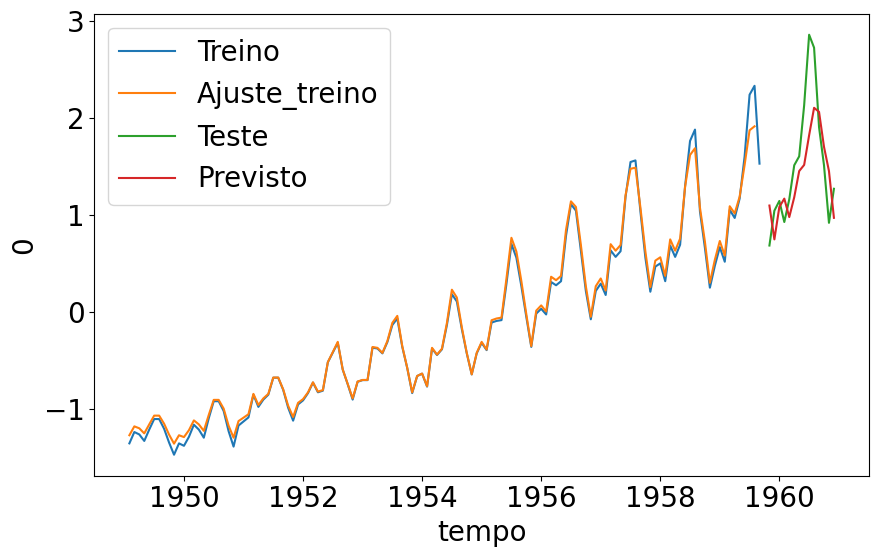

In [248]:
sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[1:129], label="Treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_pred_novo)[0], data=passageiros[1:129], label="Ajuste_treino")
sns.lineplot(x="tempo", y=y_teste_novo, data=passageiros[130:144], label="Teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[130:144], label="Previsto")